
# Week 10 — Clustering 

This notebook explores **patient subgroups** in the Chronic Kidney Disease dataset using **unsupervised learning (KMeans)**.  

## 1. Setup

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

pd.set_option("display.max_columns", 100)
print("Setup complete.")


Setup complete.


## 2. Load dataset

In [3]:
DATA_PATH = "Chronic_Kidney_Dsease_data.csv"

df = pd.read_csv(DATA_PATH)
print("Data shape:", df.shape)
display(df.head())

df.info()


Data shape: (1659, 54)


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

## 3. Select and prepare numeric features

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns selected:", numeric_cols)

X = df[numeric_cols].copy()

# Handle missing values
X = X.fillna(X.median(numeric_only=True))

# Standardize numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature matrix shape:", X_scaled.shape)


Numeric columns selected: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy', '

## 4. Visualize structure with PCA

Explained variance ratio: [0.029 0.025]


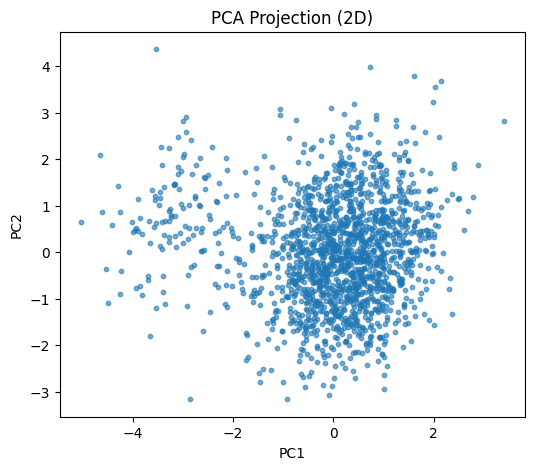

In [5]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_.round(3))

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.6)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## 5. Determine optimal number of clusters (KMeans)

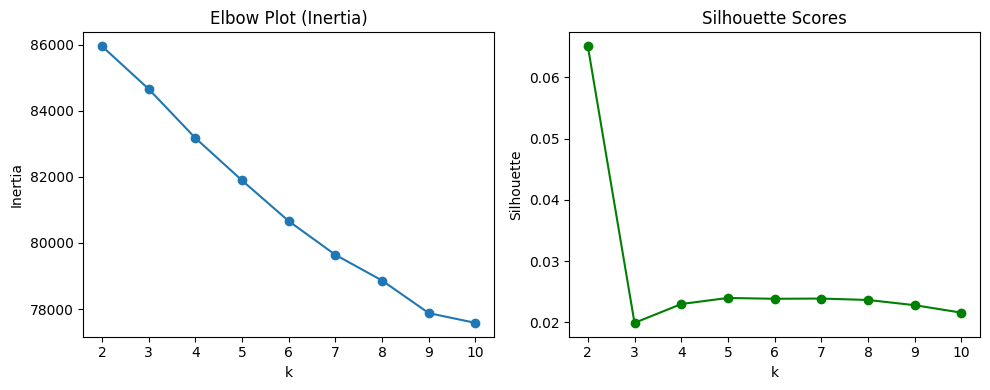

Best k by silhouette: 2


In [6]:
inertias, sils, dbs = [], [], []
ks = range(2, 11)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, labels))
    dbs.append(davies_bouldin_score(X_scaled, labels))

# Plot elbow and silhouette
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(ks, inertias, marker='o')
ax[0].set_title("Elbow Plot (Inertia)")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Inertia")

ax[1].plot(ks, sils, marker='o', color='green')
ax[1].set_title("Silhouette Scores")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Silhouette")
plt.tight_layout()
plt.show()

best_k = ks[np.argmax(sils)]
print("Best k by silhouette:", best_k)


## 6. Fit final KMeans model

Silhouette score: 0.065
Davies-Bouldin score: 3.581


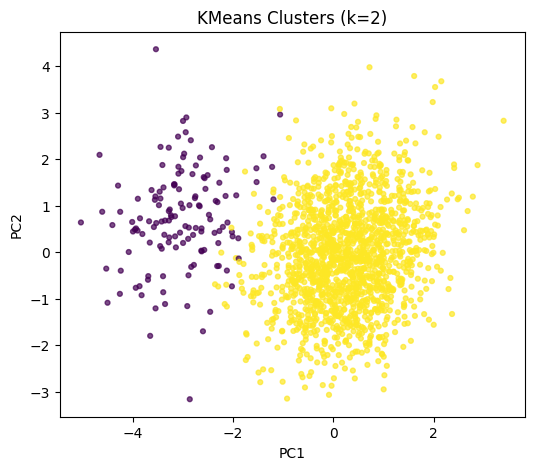

In [7]:

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=25)
df["cluster"] = kmeans.fit_predict(X_scaled)

print("Silhouette score:", round(silhouette_score(X_scaled, df['cluster']), 3))
print("Davies-Bouldin score:", round(davies_bouldin_score(X_scaled, df['cluster']), 3))

# PCA visualization with clusters
Xp = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
plt.figure(figsize=(6,5))
plt.scatter(Xp[:,0], Xp[:,1], c=df['cluster'], s=12, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans Clusters (k={best_k})")
plt.show()


## 7. Cluster profiling

In [8]:

profile = df.groupby("cluster")[numeric_cols].mean(numeric_only=True).round(2)
display(profile)

print("\nCluster sizes:")
display(df['cluster'].value_counts())


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1105.81,54.38,0.44,0.69,1.07,1.81,26.27,0.25,10.09,5.23,5.46,6.82,0.08,0.27,0.24,0.11,0.16,127.16,87.19,120.78,6.63,1.86,23.57,84.59,2.06,150.33,139.65,4.46,9.48,3.53,13.58,230.40,126.02,57.30,227.67,0.29,0.27,4.94,0.39,0.22,0.13,5.04,3.62,2.88,4.08,45.93,0.04,0.12,0.22,1.95,4.93,5.09,0.0
1,805.57,54.45,0.52,0.72,0.97,1.68,27.74,0.30,9.96,5.01,4.99,6.95,0.15,0.30,0.26,0.10,0.21,135.03,89.50,133.57,7.01,2.83,27.93,65.26,2.53,149.84,140.00,4.51,9.49,3.50,13.96,223.71,124.96,61.05,224.55,0.30,0.32,5.02,0.38,0.20,0.21,5.01,3.47,3.58,5.14,50.07,0.04,0.10,0.19,2.00,4.95,5.15,1.0



Cluster sizes:


cluster
1    1524
0     135
Name: count, dtype: int64

## 8. Conclusion


The KMeans model identified two primary patient subgroups in the Chronic Kidney Disease dataset. Cluster 0, a smaller group of about 135 patients, exhibited elevated mean values for serum creatinine, blood urea, and blood glucose, along with reduced hemoglobin and packed cell volume, which are clinical patterns characteristic of more advanced CKD. Cluster 1, which contained 1,524 patients, reflected generally normal or near-normal laboratory values, suggesting earlier disease stages or non-CKD cases. The PCA visualization showed a clear separation between these clusters, reinforcing that the unsupervised approach effectively distinguished between low- and high-risk patient profiles. These results highlight the value of clustering for identifying hidden clinical subtypes that may guide risk stratification or personalized interventions.